<a href="https://colab.research.google.com/github/ranjan2829/Quant/blob/main/Implied_Volatility_Skew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import yfinance as yf

In [4]:
import datetime as dt

In [5]:
import matplotlib.pyplot as plt


In [10]:
def fetch_data(ticker):
  Ticker = yf.Ticker(ticker)
  expirations=Ticker.options
  option_data=pd.DataFrame()
  for expiration in expirations :
    option_chain =Ticker.option_chain(expiration)
    calls=option_chain.calls
    calls['Option Type']='Call'
    puts=option_chain.puts
    puts['Option Type']='Put'
    options=pd.concat([calls,puts])
    options['Expiration Date']=pd.to_datetime(expiration)+pd.DateOffset(hours=23,minutes=59,seconds=59)
    option_data=pd.concat([option_data,options])
    option_data['Days to Expiration']=(option_data['Expiration Date']-dt.datetime.today()).dt.days+1
    return option_data




In [11]:
data=fetch_data("^NDX")

In [12]:
data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Option Type,Expiration Date,Days to Expiration
0,NDXP240322C15000000,2024-03-19 13:52:20+00:00,15000.0,2855.32,3336.2,3377.0,0.00000,0.000000,3.0,3.0,2.185216,True,REGULAR,USD,Call,2024-03-22 23:59:59,1
1,NDXP240322C15200000,2024-03-12 15:49:38+00:00,15200.0,2984.07,3136.2,3177.9,0.00000,0.000000,1.0,0.0,2.070348,True,REGULAR,USD,Call,2024-03-22 23:59:59,1
2,NDXP240322C15250000,2024-03-14 19:05:38+00:00,15250.0,3022.50,3083.6,3127.0,277.97998,10.128547,1.0,1.0,2.017812,True,REGULAR,USD,Call,2024-03-22 23:59:59,1
3,NDXP240322C15275000,2024-03-14 18:00:50+00:00,15275.0,2796.75,3058.6,3102.0,0.00000,0.000000,1.0,1.0,2.002904,True,REGULAR,USD,Call,2024-03-22 23:59:59,1
4,NDXP240322C15300000,2024-03-13 15:14:05+00:00,15300.0,2821.30,3030.6,3074.9,0.00000,0.000000,NaN,NaN,1.954285,True,REGULAR,USD,Call,2024-03-22 23:59:59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,NDXP240322P18780000,2024-03-13 19:42:34+00:00,18780.0,698.30,419.6,437.1,0.00000,0.000000,1.0,1.0,0.000010,True,REGULAR,USD,Put,2024-03-22 23:59:59,1
250,NDXP240322P18825000,2024-03-12 19:52:37+00:00,18825.0,619.00,465.2,481.8,0.00000,0.000000,1.0,1.0,0.000010,True,REGULAR,USD,Put,2024-03-22 23:59:59,1
251,NDXP240322P18900000,2024-03-12 14:41:20+00:00,18900.0,738.26,538.2,555.2,0.00000,0.000000,1.0,2.0,0.000010,True,REGULAR,USD,Put,2024-03-22 23:59:59,1
252,NDXP240322P18950000,2024-03-18 19:44:08+00:00,18950.0,916.78,588.6,606.3,0.00000,0.000000,1.0,1.0,0.000010,True,REGULAR,USD,Put,2024-03-22 23:59:59,1


In [13]:
call_options=data[data['Option Type']=='Call']


In [23]:
chosen_expiry="2024-03-22 23:59:59"
selected_calls =call_options[call_options['Expiration Date']==chosen_expiry]

In [24]:
filter_calls=selected_calls[selected_calls['impliedVolatility']>=0.005]
filter_calls.set_index("strike",inplace=True)

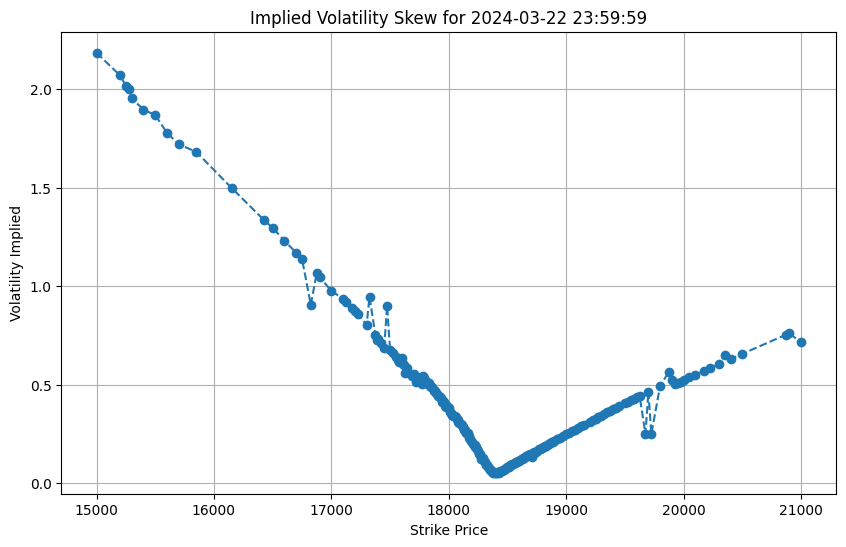

In [25]:
plt.figure(figsize=(10,6))
plt.plot(filter_calls.index,filter_calls["impliedVolatility"],marker='o',linestyle="dashed")
plt.title(f"Implied Volatility Skew for {chosen_expiry}")
plt.xlabel("Strike Price")
plt.ylabel("Volatility Implied")
plt.grid(True)

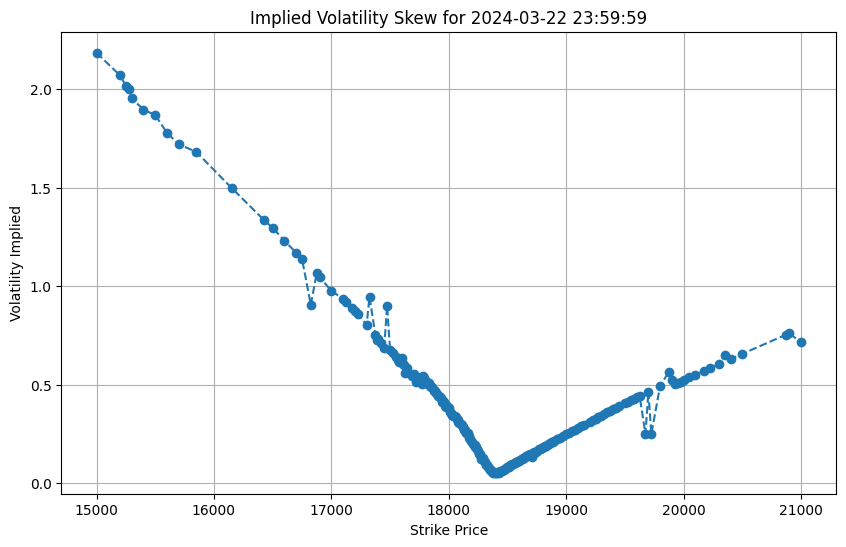

In [26]:
import matplotlib.pyplot as plt

# Assuming filter_calls is your DataFrame containing implied volatility data
plt.figure(figsize=(10, 6))
plt.plot(filter_calls.index, filter_calls["impliedVolatility"], marker='o', linestyle="dashed")
plt.title(f"Implied Volatility Skew for {chosen_expiry}")
plt.xlabel("Strike Price")
plt.ylabel("Volatility Implied")
plt.grid(True)
plt.show()


In [40]:
selected_strike=15000
selected_calls_strike=call_options[call_options['strike']==selected_strike]

In [41]:
filter_calls_strike=selected_calls_strike[selected_calls_strike['impliedVolatility']>=0.00001]
filter_calls_strike.set_index("Expiration Date",inplace=True)

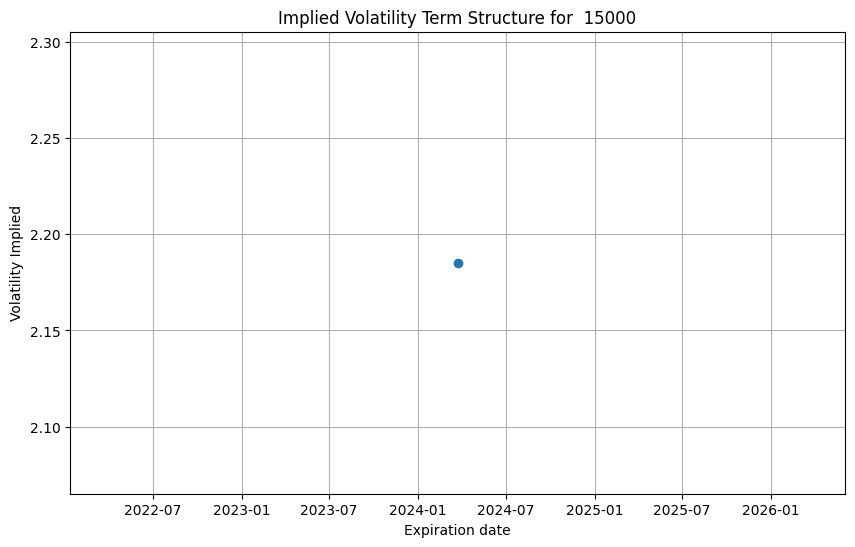

In [42]:
plt.figure(figsize=(10,6))
plt.plot(filter_calls_strike.index,filter_calls_strike["impliedVolatility"],marker='o',linestyle="dashed")
plt.title(f"Implied Volatility Term Structure for  {selected_strike}")
plt.xlabel("Expiration date")
plt.ylabel("Volatility Implied")
plt.grid(True)